### In this simple assignment, you will experiment with a toy dataset – the iris dataset

> a) Load the Iris dataset (2 points)

In [1]:
 # Import datasets library from sklearn and load the iris dataset

from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
import pandas as pd
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

iris=datasets.load_iris()

In [2]:
# Reading the Data and Target values to x and y
# Reading the target names to ynames

inputData=iris.data
target=iris.target
targetNames=iris.target_names


In [3]:
# Creating seperate lists with different columns for stratified sampling 

sepalLength=[]
sepalWidth=[]
petalLength=[]
petalWidth=[]
for row in inputData:
    sepalLength.append(row[0])
    sepalWidth.append(row[1])
    petalLength.append(row[2])
    petalWidth.append(row[2])

### As per documentation, Iris dataset has 4 input columns. 
> <b> Input Columns </b> [Sepal Length, Sepal Width, Petal Length, Petal Width]

> <b> Target Names </b> ['setosa', 'versicolor', 'virginica']

> Setosa : 0
> Versicolor : 1
> Virginica : 2, is how the Tagret names are encoded


> (b) The Iris data has 3 classes. For the purposes of this assignment,
you will modify the dataset so that it has 2 classes – specifically,
you will merge the “setosa and the versicolor” classes (2 points)

In [4]:
# Filtering out the values with value 0 and 1 and encoding them as 1 , ie combining the classes
# Encoding Setosa and Versicolor as 0 and Virginica as 1
target[(target==0) | (target==1)]=0
target[target==2]=1

> (c) Construct a training set and a testing set using an 80 −20 split
using random sampling (3 points) 

In [5]:
# Creating an index to shuffle data and shuffling data using it
indexList=[i for i in range(0,inputData.shape[0])]
inputDistribution=(len(target[target==0])/len(target[target==1]))
trainDistribution=0
testDistribution=0

np.random.shuffle(indexList) # Shuffling the index. Used for splitting train and test data
splitLength=int(len(inputData)*0.8) # Finding the position to split
trainIndex=indexList[0:splitLength]  #Splitting the train data randomly:Creating the indices
testIndex=indexList[splitLength:] #Splitting the test data randomly; Creating the indices

#Splitting the data
X_train=inputData[trainIndex]
Y_train=target[trainIndex]
X_test=inputData[testIndex]
Y_test=target[testIndex]

#Finding the distribution of test and train datasets
trainDistribution=len(Y_train[Y_train==0])/len(Y_train[Y_train==1])
testDistribution=len(Y_test[Y_test==0])/len(Y_test[Y_test==1])
print(trainDistribution,testDistribution)

2.4285714285714284 1.0


Class0/Class1 ration in input data:  2.0
Class0/Class1 ration in train data:  2.4285714285714284
Class0/Class1 ration in train data:  1.0


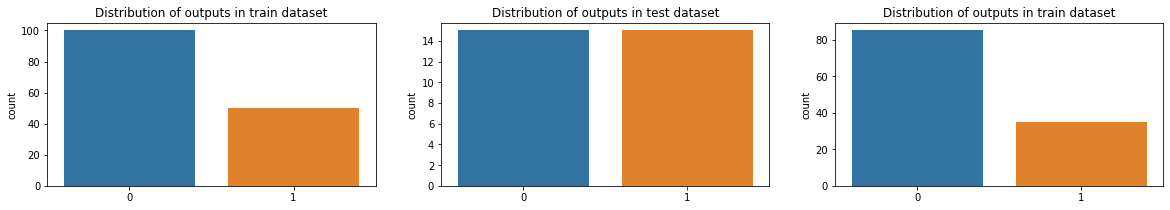

In [6]:
#Distribution of targets in train and test datasets
plt.figure(figsize=(20,3))

#Plotting the distribution countplots

plt.subplot(1,3,1)
plt.title('Distribution of outputs in train dataset')
sns.countplot(target)

plt.subplot(1,3,2)
plt.title('Distribution of outputs in test dataset')
sns.countplot(Y_test)

plt.subplot(1,3,3)
plt.title('Distribution of outputs in train dataset')
sns.countplot(Y_train)

# Finding the distribution of the two classes in main, train and test datasets

print('Class0/Class1 ration in input data: ',len(target[target==0])/len(target[target==1]))
print('Class0/Class1 ration in train data: ',len(Y_train[Y_train==0])/len(Y_train[Y_train==1]))
print('Class0/Class1 ration in train data: ',len(Y_test[Y_test==0])/len(Y_test[Y_test==1]))

### It can be seen that the distribution varies while doing random sampling. 

> (d) Use Logistic Regression as a “black-box” classifier and asses the
performance (4 points)

In [7]:
def createConfusionMatrix(predicted,target):
    """ This function creates a confusion matrix by iterating through the predicted and target lists together using the zip function. 
    It compares elements from both the list elementwise and then checks if it is true positive, 
    false positive, true negative or false negative. """
    
    trueNegative=0
    truePositive=0
    falsePositive=0
    falseNegative=0
    for prediction,actual in zip(predicted,target):
        if (prediction==0) & (actual==0):
            trueNegative+=1
        elif (prediction==0) & (actual==1):
            falsePositive+=1
        elif (prediction==1) & (actual==0):
            falseNegative+=1
        elif (prediction==1) & (actual==1):
            truePositive+=1
    # Creating the confusion matrix
    confusionMatrix=[[truePositive,falseNegative],[falsePositive,trueNegative]]
    return confusionMatrix
            

In [8]:
def symmetricLossFunction(predicted,actual):
    """ Function to calculate the symmetric loss function. Here, the false negatives and false positives are penalised. 
    Hence this cannot be used to functions where we need to penalise false positive or true negative more"""
    
    loss=0
    if len(predicted)==len(actual):
        for i in range(len(predicted)):
            if predicted[i]!=actual[i]:
                loss+=1
    return loss

<AxesSubplot:title={'center':'Confusion Matrix on Test Data'}>

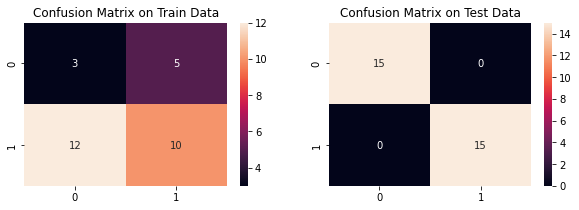

In [9]:
lr=LogisticRegression() # Creating a logistic regression object

# Applying Logistic Regression on the unbalanced Dataset
lr.fit(X_train,Y_train) # Fitting the object on train dataset to create the model
# Doing predictions on train and test datasets
Y_train_predicted=lr.predict(X_train)
Y_test_predicted=lr.predict(X_test)

# Plotting the confusion matrix using the sns heatmap for train and test data
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Confusion Matrix on Train Data')
confusionTrain=createConfusionMatrix(Y_train_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

plt.subplot(1,2,2)
plt.title('Confusion Matrix on Test Data')
confusionTrain=createConfusionMatrix(Y_test_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

In [10]:
print('Score on Train data using inbuilt method : ',np.round(lr.score(X_train,Y_train)*100,2))
print('Score on Test data using inbuilt method : ',np.round(lr.score(X_test,Y_test)*100,2))

Score on Train data using inbuilt method :  95.83
Score on Test data using inbuilt method :  100.0


In [11]:

print('Symmetry Loss on train dataset : ',symmetricLossFunction(Y_train_predicted,Y_train))
print('Symmetry Loss on test dataset : ',symmetricLossFunction(Y_test_predicted,Y_test))

Symmetry Loss on train dataset :  5
Symmetry Loss on test dataset :  0


### The model performs well enough on the train and test data.
> - The model performance can be seen better from the confusion matrix.
> - Although the model has good performance, there are a few False positives and False Negatives
> - The test dataset has comparitively lower number of False positives and False Negatives
> - The symmetry loss functions on train and test datasets are also calculated as we want to penalise the False Negatives and False Positives equally in this case. 

> e) Implement stratified sampling, again using 80% of the data for
training and 20% of the data for testing. Decide the stratification
variable and explain your choice (4 points)

# Proportionate Stratified Sampling

### Stratification variable selected as the target variable itself.Explanations and example below

#### Here we try three things
> Results from straified Sampling on the target column which is the output

> Results from the random sampling

> Results from stratified sampling on the Petal Length column which is an input

In [12]:
from sklearn.model_selection import train_test_split

# Creating a dataframe to store the results from each iterations
dispropDF=pd.DataFrame()
iteration=[]
mainProp=[]
testProp=[]
trainProp=[]
trainLoss=[]
testLoss=[]
trainScore=[]
testScore=[]
for i in range(10): # Do the iteration of sampling and training 10 times
    iteration.append(i)
    
    # Create the disproportionate stratified sampling using the train, test splot methos with 20% test size
    
    X_train,X_test,Y_train,Y_test=train_test_split(inputData,target,stratify=target,test_size=0.2)

    # Find distributions and append it to list
    mainProp.append(len(target[target==0])/len(target[target==1]))
    trainProp.append(len(Y_train[Y_train==0])/len(Y_train[Y_train==1]))
    testProp.append(len(Y_test[Y_test==0])/len(Y_test[Y_test==1]))
    
    
    lr=LogisticRegression()

    # Applying Logistic Regression on the unbalanced Dataset
    lr.fit(X_train,Y_train)
    Y_train_predicted=lr.predict(X_train)
    Y_test_predicted=lr.predict(X_test)

    # Append losses of the function to list
    trainLoss.append(symmetricLossFunction(Y_train_predicted,Y_train))
    testLoss.append(symmetricLossFunction(Y_test_predicted,Y_test))
    trainScore.append(lr.score(X_train,Y_train))
    testScore.append(lr.score(X_test,Y_test))
# Add the calculated data from iterations to the datasets
dispropDF['Iteration']=iteration
dispropDF['Main Data Proportion']=mainProp
dispropDF['Test Data Proportion']=testProp
dispropDF['Train Data Proportion']=trainProp
dispropDF['Train Data Loss']=trainLoss
dispropDF['Test Data Loss']=testLoss
dispropDF['Train Score']=trainScore
dispropDF['Test Score']=testScore
                     
dispropDF# Print the dataset for the disproportionate stratified sampling

,Iteration,Main Data Proportion,Test Data Proportion,Train Data Proportion,Train Data Loss,Test Data Loss,Train Score,Test Score
0,0,2.0,2.0,2.0,3,0,0.975000,1.000000
1,1,2.0,2.0,2.0,3,1,0.975000,0.966667
2,2,2.0,2.0,2.0,3,0,0.975000,1.000000
3,3,2.0,2.0,2.0,3,1,0.975000,0.966667
4,4,2.0,2.0,2.0,4,0,0.966667,1.000000
5,5,2.0,2.0,2.0,4,0,0.966667,1.000000
6,6,2.0,2.0,2.0,3,0,0.975000,1.000000
7,7,2.0,2.0,2.0,4,0,0.966667,1.000000
8,8,2.0,2.0,2.0,3,1,0.975000,0.966667
9,9,2.0,2.0,2.0,3,1,0.975000,0.966667


<AxesSubplot:title={'center':'Confusion Matrix on Test Data'}>

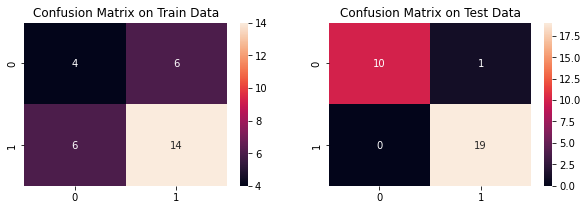

In [13]:
# Plotting the confusion matrix using the sns heatmap for train and test data for the last result
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Confusion Matrix on Train Data')
confusionTrain=createConfusionMatrix(Y_train_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

plt.subplot(1,2,2)
plt.title('Confusion Matrix on Test Data')
confusionTrain=createConfusionMatrix(Y_test_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

### Checking the behavious for random sampling to compare the results

In [14]:

# Creating a dataframe to store the results from each iterations
propDF=pd.DataFrame()
iteration=[]
mainProp=[]
testProp=[]
trainProp=[]
trainLoss=[]
testLoss=[]
trainScore=[]
testScore=[]

for i in range(10):
    # Creating an index to shuffle data and shuffling data using it
    iteration.append(i)
    
    indexList=[i for i in range(0,inputData.shape[0])]
    inputDistribution=(len(target[target==0])/len(target[target==1]))
    trainDistribution=0
    testDistribution=0

    np.random.shuffle(indexList) # Shuffling the index. Used for splitting train and test data
    splitLength=int(len(inputData)*0.8) # Finding the position to split
    trainIndex=indexList[0:splitLength]  #Splitting the train data randomly:Creating the indices
    testIndex=indexList[splitLength:] #Splitting the test data randomly; Creating the indices

    #Splitting the data
    X_train=inputData[trainIndex]
    Y_train=target[trainIndex]
    X_test=inputData[testIndex]
    Y_test=target[testIndex]

    # Find distributions and append it to list
    mainProp.append(len(target[target==0])/len(target[target==1]))
    trainProp.append(len(Y_train[Y_train==0])/len(Y_train[Y_train==1]))
    testProp.append(len(Y_test[Y_test==0])/len(Y_test[Y_test==1]))


    lr=LogisticRegression()

    # Applying Logistic Regression on the unbalanced Dataset
    lr.fit(X_train,Y_train)
    Y_train_predicted=lr.predict(X_train)
    Y_test_predicted=lr.predict(X_test)

    # Append losses of the function to list
    trainLoss.append(symmetricLossFunction(Y_train_predicted,Y_train))
    testLoss.append(symmetricLossFunction(Y_test_predicted,Y_test))
    trainScore.append(lr.score(X_train,Y_train))
    testScore.append(lr.score(X_test,Y_test))
    
# Add the calculated data from iterations to the datasets
propDF['Iteration']=iteration
propDF['Main Data Proportion']=mainProp
propDF['Test Data Proportion']=testProp
propDF['Train Data Proportion']=trainProp
propDF['Train Data Loss']=trainLoss
propDF['Test Data Loss']=testLoss
propDF['Train Score']=trainScore
propDF['Test Score']=testScore
                     
propDF

,Iteration,Main Data Proportion,Test Data Proportion,Train Data Proportion,Train Data Loss,Test Data Loss,Train Score,Test Score
0,0,2.0,2.333333,1.926829,3,1,0.975000,0.966667
1,1,2.0,2.333333,1.926829,5,0,0.958333,1.000000
2,2,2.0,2.333333,1.926829,2,1,0.983333,0.966667
3,3,2.0,3.285714,1.790698,3,1,0.975000,0.966667
4,4,2.0,5.000000,1.666667,4,1,0.966667,0.966667
5,5,2.0,2.000000,2.000000,3,1,0.975000,0.966667
6,6,2.0,1.727273,2.076923,4,2,0.966667,0.933333
7,7,2.0,1.727273,2.076923,3,2,0.975000,0.933333
8,8,2.0,3.285714,1.790698,2,1,0.983333,0.966667
9,9,2.0,3.285714,1.790698,3,1,0.975000,0.966667


<AxesSubplot:title={'center':'Confusion Matrix on Test Data'}>

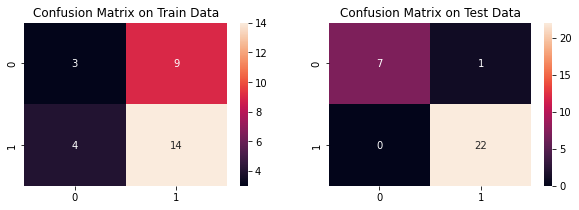

In [15]:
# Plotting the confusion matrix using the sns heatmap for train and test data for the last result
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Confusion Matrix on Train Data')
confusionTrain=createConfusionMatrix(Y_train_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

plt.subplot(1,2,2)
plt.title('Confusion Matrix on Test Data')
confusionTrain=createConfusionMatrix(Y_test_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

### It can be seen that the variance of loss is almost the same in both the cases. It can be because the size of the dataset is less. 

### But it can be clearly seen that the proportion of data is maintained while using stratified sampling, which makes the train and test dataset a closer approximation of the population data

### Using Stratified sampling based on a continous column

In [24]:
bins=np.linspace(min(petalWidth)-1,max(petalWidth)+1,5)
binned=np.digitize(petalWidth,bins)
from sklearn.model_selection import train_test_split

# Creating a dataframe to store the results from each iterations
dispropDF=pd.DataFrame()
iteration=[]
mainProp=[]
testProp=[]
trainProp=[]
trainLoss=[]
testLoss=[]
trainScore=[]
testScore=[]

for i in range(10): # Do the iteration of sampling and training 10 times
    iteration.append(i)
    
    # Create the disproportionate stratified sampling using the train, test splot methos with 20% test size
    
    X_train,X_test,Y_train,Y_test=train_test_split(inputData,target,stratify=binned,test_size=0.2)

    # Find distributions and append it to list
    mainProp.append(len(target[target==0])/len(target[target==1]))
    trainProp.append(len(Y_train[Y_train==0])/len(Y_train[Y_train==1]))
    testProp.append(len(Y_test[Y_test==0])/len(Y_test[Y_test==1]))
    
    
    lr=LogisticRegression()

    # Applying Logistic Regression on the unbalanced Dataset
    lr.fit(X_train,Y_train)
    Y_train_predicted=lr.predict(X_train)
    Y_test_predicted=lr.predict(X_test)

    # Append losses of the function to list
    trainLoss.append(symmetricLossFunction(Y_train_predicted,Y_train))
    testLoss.append(symmetricLossFunction(Y_test_predicted,Y_test))
    trainScore.append(lr.score(X_train,Y_train))
    testScore.append(lr.score(X_test,Y_test))
    
# Add the calculated data from iterations to the datasets
dispropDF['Iteration']=iteration
dispropDF['Main Data Proportion']=mainProp
dispropDF['Test Data Proportion']=testProp
dispropDF['Train Data Proportion']=trainProp
dispropDF['Train Data Loss']=trainLoss
dispropDF['Test Data Loss']=testLoss
dispropDF['Train Score']=trainScore
dispropDF['Test Score']=testScore
                     
dispropDF

,Iteration,Main Data Proportion,Test Data Proportion,Train Data Proportion,Train Data Loss,Test Data Loss,Train Score,Test Score
0,0,2.0,2.000000,2.000000,4,0,0.966667,1.000000
1,1,2.0,2.750000,1.857143,3,1,0.975000,0.966667
2,2,2.0,2.333333,1.926829,1,3,0.991667,0.900000
3,3,2.0,4.000000,1.727273,3,1,0.975000,0.966667
4,4,2.0,2.000000,2.000000,3,1,0.975000,0.966667
5,5,2.0,1.500000,2.157895,3,0,0.975000,1.000000
6,6,2.0,1.727273,2.076923,5,0,0.958333,1.000000
7,7,2.0,2.333333,1.926829,3,1,0.975000,0.966667
8,8,2.0,2.000000,2.000000,3,1,0.975000,0.966667
9,9,2.0,3.285714,1.790698,2,2,0.983333,0.933333


<AxesSubplot:title={'center':'Confusion Matrix on Test Data'}>

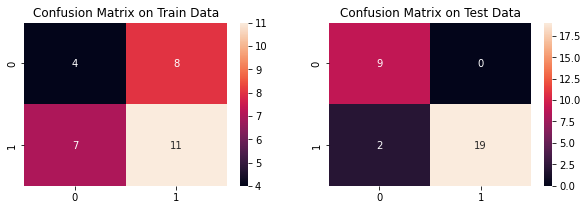

In [19]:
# Plotting the confusion matrix using the sns heatmap for train and test data for the last result
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Confusion Matrix on Train Data')
confusionTrain=createConfusionMatrix(Y_train_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

plt.subplot(1,2,2)
plt.title('Confusion Matrix on Test Data')
confusionTrain=createConfusionMatrix(Y_test_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

#### In the last Stratified sampling, where the Stratification variable was selected as Petal Length, it can be seen that the pair of train and test scores are repeating a lot. The same pair is seen more than one times, and there seems to be a better estimation in estimation of the score.

#### In the first method, the proportion of the samples in train and test dataset was same as that in the original dataset, but the pairs of train and test scores seems to be random in most of the cases. 


#### The same case is observed for random sampling as well

#### It would be a better idea to do stratified sampling on any of the input variables as they seem to be leading to more stable scores of the machines performance. 